# MA124 Maths by Computer: Submission 1 for Assignment 3
## Monte Carlo Integration 

**Student ID:** _2003869_

Consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = \sin(x^2)$, $a=0$ and $b = \sqrt{2\pi}$. As noted [here](https://en.wikipedia.org/wiki/Nonelementary_integral), $\sin(x^2)$ does not have an elementary antiderivative so we use numerical methods to evaluate this integral.

Below, I have used two methods to do so.
> - **Method 1**: Use Monte Carlo to estimate $\bar f$ (the mean value of $f$ over the interval $[a,b]$) and from that estimate the integral. Or...
> - **Method 2**: Use the fact that 
$$
\int_a^b f(x) \, dx = \text{area under the curve}
$$
where "under the curve" means the *signed area* between the curve $y = f(x)$ and the x axis. And from that use Monte Carlo to estimate the integral by estimating areas.

**_First Method_**:


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#First Method
# Define function sin(x^2)
def my_fun(x):
    return np.sin(x**2)

# set the interval [0,sqrt(2*pi)] and the number of samples
a, b = 0, np.sqrt(2*np.pi)
N = 1000000

# generate random samples uniformly distributed across [a,b]
# And find f for each of the points 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# find mean and from that, estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean

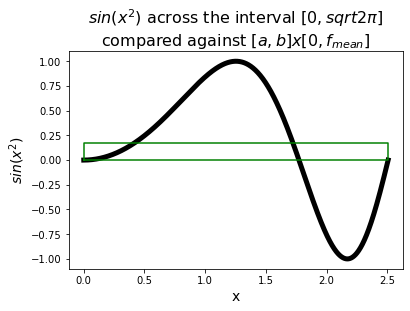

Note first, the mean value of f is  0.17038769045299726
The Monte Carlo estimate / Method 1's estimate for the integral is 0.42709860253855747


In [3]:
# plot f(x) and compare against a box [a,b]x[0,f_mean]
smallerN = 2000
x = np.linspace(a, b, smallerN)
y = my_fun(x)
plt.plot(x ,y,color='black',lw=5)
plt.plot([a,a,b,b,a],[0,f_mean,f_mean,0,0], 'g')
plt.xlabel("x", fontsize=14)
plt.ylabel(r'$sin(x^2)$', fontsize=14)
plt.title(r'$sin(x^2)$ across the interval $[0,sqrt{2\pi}]$''\n''compared against $[a,b] x [0,f_{mean}]$', fontsize=16)
plt.show()


print("Note first, the mean value of f is ",f_mean)
print("The Monte Carlo estimate / Method 1's estimate for the integral is", my_integral)

**_Second Method:_**

In [4]:
#Second Method
#Function that determines which partion of graph coordinate is in and assigns it a colour respectively
def whichRegion(x,y):
    returnColour = [0,0,0]
    trueY = my_fun(x)
    if x < np.sqrt((np.pi)):      #If coord is to the left of the root...
        if (y <= trueY) and (y>=0): #...and is below the curve but above the x axis then
            returnColour[0]=1
        else:
            returnColour[2]=1
    else:                           #If coord is to the right of the root...
        if (y >= trueY) and (y<=0): #...and is above the curve but below the x axis then
            returnColour[1]=1
        else:
            returnColour[2]=1
    return returnColour

In [5]:
def IndicatorFunc(x, y):
    # Indicator (ish) function that returns 
    #  1 if (x,y) is in the closed area bounded by the curve and the x axis left of the root, 
    # -1 if (x,y) is in the closed area bounded by the curve and the x axis right of the root,
    #  0 if (x,y) otherwise
    
    region = whichRegion(x,y)
    returnVal = 0
    if region[0] == 1:
        returnVal = 1
    elif region[1] == 1:
        returnVal = -1
    return returnVal

In [6]:
#Setup

#NB minimum of f(x) = -1 and maximum of f(x) = 1
y_min = -1
y_max = 1
#a,b have already been defined

# generate random sample of points inside square [0,sqrt(2*pi)]x[-1,1]
x = np.random.uniform(a, b, N)
y = np.random.uniform(y_min, y_max, N)

#Calculate value for estimate of integral
totalPoints = 0
for i in range(N):
    totalPoints += IndicatorFunc(x[i], y[i])
    
areaOfRect = (b - a) * (y_max - y_min)            #Area of rectangle is 2 * sqrt(2*pi)
estimateIntegral = areaOfRect * totalPoints / N   

# generate random samples uniformly distributed across [a,b]
# And find f for each of the points and from that the region they lie in
#as well as finding the average colour
xSample = np.random.uniform(a, b, smallerN)
ySample = np.random.uniform(y_min, y_max, smallerN)
reg0Mean = 0
reg1Mean = 0
reg2Mean = 0



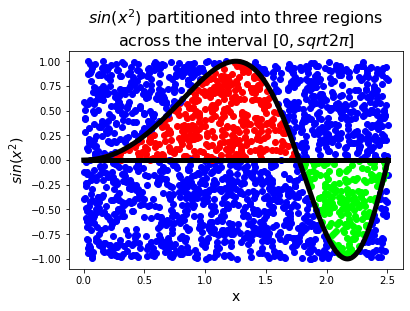

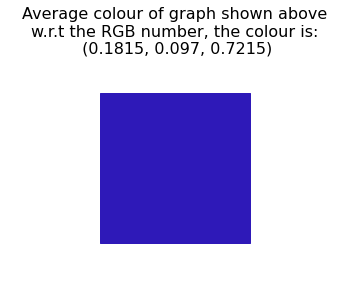

Method 2's estimate for the integral is 0.43224799293391897


In [7]:
#Plotting stuff and calculating mean colours...

for i in range(smallerN):
    region = whichRegion(xSample[i],ySample[i])
    reg0Mean += region[0]
    reg1Mean += region[1]
    reg2Mean += region[2]
    plt.plot(xSample[i],ySample[i],'o',color = (region[0], region[1], region[2]))

reg0Mean *= 1/smallerN
reg1Mean *= 1/smallerN
reg2Mean *= 1/smallerN

#plot f(x) again
x = np.linspace(a, b, smallerN)
y = my_fun(x)
plt.plot(x,y,color='black',lw=5)
plt.plot([0,np.sqrt(2*np.pi)],[0,0],color='black',lw=5)
plt.xlabel("x", fontsize=14)
plt.ylabel(r'$sin(x^2)$', fontsize=14)
plt.title(r'$sin(x^2)$ partitioned into three regions''\n''across the interval $[0,sqrt{2\pi}]$', fontsize=16)
plt.show()

#find and plot average colour
plt.plot(0.5, 0.5, 's', markersize=150, color = (reg0Mean,reg1Mean,reg2Mean))
plt.title("Average colour of graph shown above""\n""w.r.t the RGB number, the colour is:""\n"" ("+str(reg0Mean)+", "+str(reg1Mean)+", "+str(reg2Mean)+")", fontsize=16)
plt.axis('off')
plt.show()


print("Method 2's estimate for the integral is", estimateIntegral)

## In summary:

We can conclude from both methods that the true value of 
$$
\int_0^{\sqrt{2\pi}} \sin(x^2) \, dx
$$
lies somewhere closes to the value $0.43$